# Логістична регресія

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

_Загружаємо дані  та аналізуємо таблицю_

In [234]:
data  = pd.read_csv('banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


_Перевіряємо розмірність датасету, та перевіряємо на наявність нульових значень_

In [216]:
data.shape

(41188, 21)

In [217]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

_Визначаємо змінну шукомої велечини, та видаляємо серію з основного датасету_

In [218]:
y = data.y.values

In [219]:
data.drop(['y'], axis=1, inplace=True)

_Визначаємо предиктори_

In [220]:
X = data
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2


_За допомогою LabelEncoder, індексуємо  всі текстові дані в датасеті, в циклі превіряючі якщо серія мість текстові данні то їх змінюємо на індкес_

In [221]:
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':  
        data[column] = label_encoder.fit_transform(data[column])
X.head()        

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,1,2,0,0,1,2,210,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1
1,53,9,1,7,0,0,0,0,7,0,138,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8
2,28,4,2,6,0,2,0,0,4,2,339,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,7,1,3,0,0,0,0,0,0,185,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
4,55,5,1,0,0,2,0,0,1,0,137,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2


_Розбиваємо на тренувальну та тестову вибірку_

In [222]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=0)

_Навчаємо модель , та робимо придикцію шукомої велечини. В параметрах моделі використовою параметр "liblinear", або як альтернативу можно використати параметр "newton-cholesky" , оскільки при даному параметрі виходять найкращі метрики._

In [223]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [224]:
y_pred = logreg.predict(X_test)

_Будуємо матрицю похобок та візуалізуємо її_

In [225]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[10716,   265],
       [  798,   578]], dtype=int64)

<Axes: >

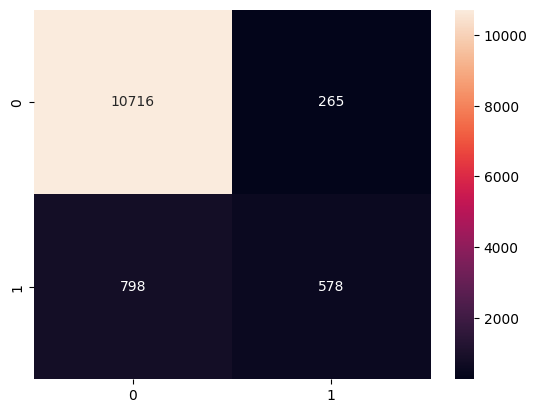

In [226]:
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

_Розраховуємо метрики для оцінки данної моделі_

In [227]:
print(" Accuracy:",metrics.accuracy_score(y_test, y_pred))

 Accuracy: 0.9139758841142672


In [228]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.6856465005931198


In [229]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.42005813953488375


In [233]:
print("F1:",metrics.f1_score(y_test, y_pred, average = None))

F1: [0.95274505 0.52095539]


_Будуємо графік AUC-ROC для візуалізації якості алгоритму_

In [231]:
y_pred_proba = logreg.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)

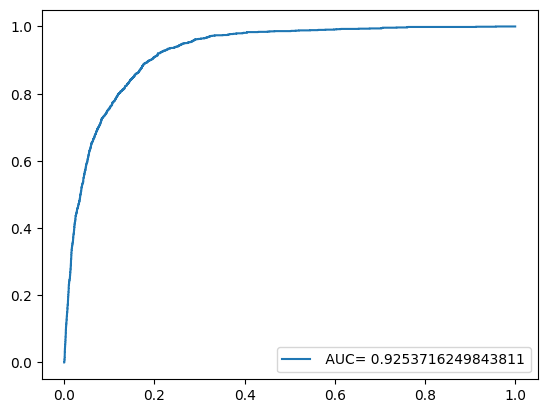

In [232]:
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

## Висновок

Оцінючи данну модель, можу зробити висновок, що данна модель не є ідеальною, оскільки не зважаючи на гарні показники Accuracy та AUC, точність є досить маленькою (68%) , та модель робить помилки  першого та другого роду( 265, 798) відповідно. Це означає що для банку  помилки першого роду є потенцій збиток, а другого роду недоотрманий прибуток. Тому подальшою цілю є збільшення метрик точності та повноти.